# Лабораторная работа №3
## Соляник Дмитрий 19-ИВТ-2
## Вариант №5 Zoo

## Задание: 

Цель лабораторной работы – получение навыков работы с методами классификации.
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Кодировка классификаторов:

1 – классификатор K ближайших соседей (задаётся количество ближайших объектов)

2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)

3 – линейный классификатор (персептрон)

4 – логический классификатор (бинарное решающее дерево)


## 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

In [93]:
import pandas as pd
zoo_df = pd.read_csv("zoo.csv")
zoo_df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

1.	animal_name - Название животного
2.	hair        - Наличие шерсти
3.	feathers    - Наличие перья
4.	eggs        - Несёт ли яйца 
5.	milk        - Дает ли молоко
6.	airborne    - Способность летать
7.	aquatic     - Обитает в воде
8.	predator    - Хищник
9.	toothed     - Наличие зубов
10.	backbone    - Позвоночное
11.	breathes    - Дышит ли воздухом
12.	venomous    - Ядовитый
13.	fins        - Наличие рёбер
14.	legs        - Количество ног
15.	tail        - Наличие хвоста
16.	domestic    - Домашнее
17.	catsize     - Больше среднего кота
18.	class_type  - Тип класса


## 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [94]:
print("Количество строк и столбцов до удаления строк с дубликатами, соответственно равны: ",zoo_df.shape)
print("Количество строк и столбцов после удаления строк с дубликатамих, соответственно равны: ",zoo_df.drop_duplicates().shape)

Количество строк и столбцов до удаления строк с дубликатами, соответственно равны:  (101, 18)
Количество строк и столбцов после удаления строк с дубликатамих, соответственно равны:  (101, 18)


## 3) Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:>

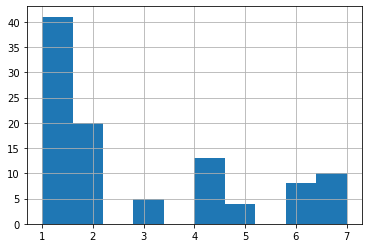

In [95]:
zoo_df.class_type.hist()

Классы не сбалансированы. По количеству зверей лидирует первый класс.

## 4) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [96]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


<AxesSubplot:>

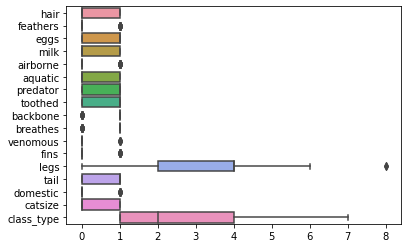

In [97]:
import seaborn as sns
from sklearn import preprocessing
numerical_attributes = [column for column in zoo_df.columns if zoo_df[column].dtype.name == 'int64']
print(numerical_attributes)
sns.boxplot(data = zoo_df[numerical_attributes], orient = 'h')

<AxesSubplot:>

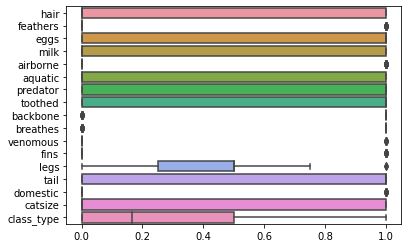

In [98]:
zoo_df[numerical_attributes] = preprocessing.MinMaxScaler().fit_transform(zoo_df[numerical_attributes].values.astype(float))#Масштабируем нормализацией 
sns.boxplot(data = zoo_df[numerical_attributes], orient = 'h')

## 5) Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [99]:
categorical_attributes = [column for column in zoo_df.columns if zoo_df[column].dtype.name == 'object']
print(categorical_attributes)
zoo_df = zoo_df.drop(categorical_attributes, axis=1)

['animal_name']


## 6) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

<AxesSubplot:>

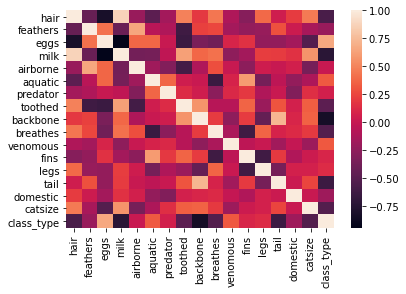

In [100]:
corr_matrix = zoo_df.corr()
sns.heatmap(corr_matrix)

## 7) Заполните пропущенные значения в данных

In [101]:
zoo_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hair        101 non-null    float64
 1   feathers    101 non-null    float64
 2   eggs        101 non-null    float64
 3   milk        101 non-null    float64
 4   airborne    101 non-null    float64
 5   aquatic     101 non-null    float64
 6   predator    101 non-null    float64
 7   toothed     101 non-null    float64
 8   backbone    101 non-null    float64
 9   breathes    101 non-null    float64
 10  venomous    101 non-null    float64
 11  fins        101 non-null    float64
 12  legs        101 non-null    float64
 13  tail        101 non-null    float64
 14  domestic    101 non-null    float64
 15  catsize     101 non-null    float64
 16  class_type  101 non-null    float64
dtypes: float64(17)
memory usage: 13.5 KB


## 8) Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

In [102]:
import numpy as np
import sklearn as skl
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

In [103]:
X = zoo_df.drop(['aquatic'], axis=1)
Y = zoo_df['aquatic']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#### Классификатор K ближайших соседей

In [104]:
KNN = KNeighborsClassifier()

search = GridSearchCV(KNN, {'n_neighbors': range (1,55)})
search.fit(X_train, Y_train)

n = search.best_estimator_.n_neighbors

KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, Y_train)
print("Accuracy of KNN model:", accuracy_score(Y_test, KNN.predict(X_test)))
print('Best accuracy:', search.best_score_)

Accuracy of KNN model: 0.8064516129032258
Best accuracy: 0.8714285714285716


#### Логический классификатор (бинарное решающее дерево)

In [105]:
DTC = DecisionTreeClassifier()

DTC_grid = GridSearchCV(DTC, {'max_depth': list(range(1, 6)), 'max_features': list(range(1, 6))})
DTC_grid.fit (X_train, Y_train)

best_depth = DTC_grid.best_estimator_.max_depth # Находим лучшую глубину
best_features = DTC_grid.best_estimator_.max_features # Находим лучшее количество признаков, которые следует учитывать при поиске

DTC = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
DTC.fit(X_train, Y_train)

accuracy_score = np.mean(Y_test == DTC.predict(X_test))
print("Accuracy of DTC model:",  accuracy_score)
print("Best accuracy:", DTC_grid.best_score_)

Accuracy of DTC model: 0.8387096774193549
Best accuracy: 0.8714285714285713


In [106]:
# from sklearn.tree import export_graphviz
# # from sklearn.externals.six import StringIO
# from six import StringIO
# from IPython.display import Image
# import pydotplus

# dot_data = StringIO()
# export_graphviz(DTC, out_file=dot_data,
#                 filled= True , rounded = True,
#                 special_characters = True, feature_names=feature_cols, class_names=['0','1'])
# graph = pydotplus.graph.graph_from_dot_data(dot_data.getvalue())   
# graph.write_png('DTC.png')
# Image(graph.create_png())                                                                                                                                            

#### PR

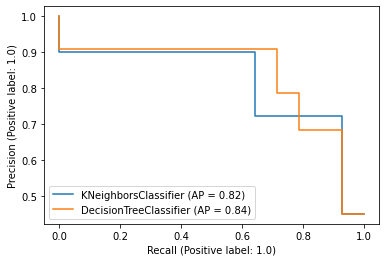

In [107]:
i = plot_precision_recall_curve(KNN, X_test, Y_test)
g = plot_precision_recall_curve(DTC, X_test, Y_test, ax = i.ax_)

#### ROC

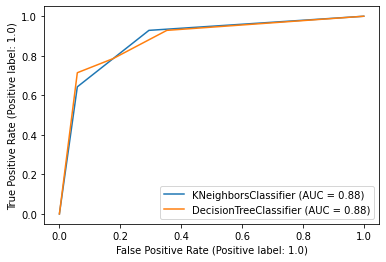

In [108]:
i = plot_roc_curve(KNN, X_test, Y_test)
g = plot_roc_curve(DTC, X_test, Y_test, ax = i.ax_)

## 9) Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Линейный классификатор(бинарное решающее дерево) и k ближайших соседей имеют примерно одинаковые показатели.